# Time Series Analysis

## Aufgabe 11.1

In [25]:
# 11.1 c) 
import pandas as pd
import matplotlib.pyplot as plt

# Read data
pw_electric = pd.read_csv('data/PW_electric.csv', sep=',',
                          skiprows=2,
                          header=0,
                          encoding = "utf-8",
                          index_col=0)

pw_electric.drop(["Treibstoff"], axis=1, inplace=True)
pw_electric.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Kanton,,,,,,,,,,,,,,,,,,,,,
Zürich,64,120,161,153,153,150,139,131,121,106,...,32,42,150,211,428,737,1201,2201,2855,3743
Bern / Berne,75,130,132,134,113,113,108,101,99,89,...,42,42,46,108,177,269,428,682,971,1343
Luzern,12,21,25,24,23,20,21,18,14,12,...,5,3,10,38,79,118,196,350,530,719
Uri,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,4,5,10,12,22,29
Schwyz,1,5,7,8,9,10,11,11,12,9,...,0,2,7,15,37,54,112,195,292,387


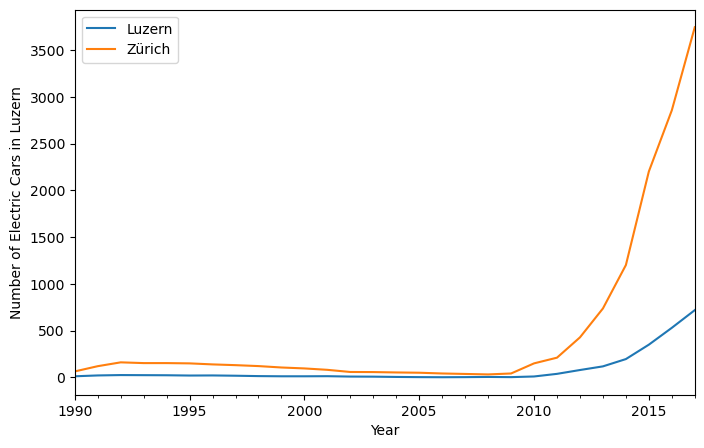

In [34]:
pw_elec_lu = pd.DataFrame(pw_electric.loc["Luzern"]["1990":])
pw_elec_lu["Year"] = pd.to_datetime(pw_elec_lu.index) # Convert to DateTime format
pw_elec_lu.set_index("Year", inplace=True) # Create and set DatetimeIndex

pw_elec_zh = pd.DataFrame(pw_electric.loc["Zürich"]["1990":])
pw_elec_zh["Year"] = pd.to_datetime(pw_elec_lu.index) # Convert to DateTime format
pw_elec_zh.set_index("Year", inplace=True) # Create and set DatetimeIndex


# Plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
pw_elec_lu.plot(ax=ax)
pw_elec_zh.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Number of Electric Cars in Luzern")
plt.show()



C:\Users\justi\AppData\Local\Temp\ipykernel_16172\1383897977.py:5: RuntimeWarning: divide by zero encountered in log
  pw_elec_lu["rel"] = np.log(pw_elec_lu) - np.log(pw_elec_lu.shift(1))
C:\Users\justi\AppData\Local\Temp\ipykernel_16172\1383897977.py:5: RuntimeWarning: invalid value encountered in log
  pw_elec_lu["rel"] = np.log(pw_elec_lu) - np.log(pw_elec_lu.shift(1))
C:\Users\justi\AppData\Local\Temp\ipykernel_16172\1383897977.py:8: RuntimeWarning: divide by zero encountered in log
  pw_elec_zh["rel"] = np.log(pw_elec_zh) - np.log(pw_elec_zh.shift(1))
C:\Users\justi\AppData\Local\Temp\ipykernel_16172\1383897977.py:8: RuntimeWarning: invalid value encountered in log
  pw_elec_zh["rel"] = np.log(pw_elec_zh) - np.log(pw_elec_zh.shift(1))


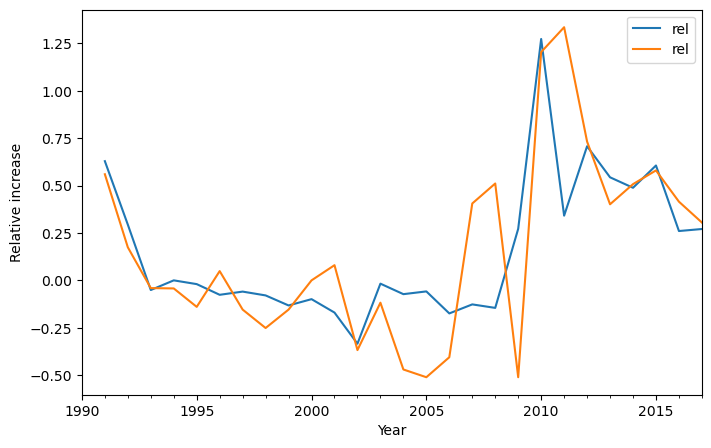

In [36]:
import numpy as np

# Log returns (relativ change):
pw_elec_lu = pw_elec_lu.astype('float')
pw_elec_lu["rel"] = np.log(pw_elec_lu) - np.log(pw_elec_lu.shift(1))
# Relative change in Zuerich
pw_elec_zh = pw_elec_zh.astype('float')
pw_elec_zh["rel"] = np.log(pw_elec_zh) - np.log(pw_elec_zh.shift(1))

# Plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
pw_elec_zh.plot(y="rel", ax=ax)
pw_elec_lu.plot(y="rel", ax=ax)
plt.xlabel("Year")
plt.ylabel("Relative increase")
plt.show()


In [49]:
# 11.2 a) Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load data
AusBeer = pd.read_csv('data/AustralianBeer.csv',sep = ";", header = 0)

# Convert TravelDate to Datetime Format
AusBeer["Quarter"] = pd.to_datetime(AusBeer["Quarter"])
# Create pandas DateTimeIndex
dtindex = pd.DatetimeIndex(data=AusBeer["Quarter"], freq='infer')
# Set as Index
AusBeer.set_index(dtindex, inplace=True)
AusBeer.drop("Quarter", axis=1, inplace=True)
AusBeer.head()



,megalitres
Quarter,
1956-01-01,284.4
1956-04-01,212.8
1956-07-01,226.9
1956-10-01,308.4
1957-01-01,262.0


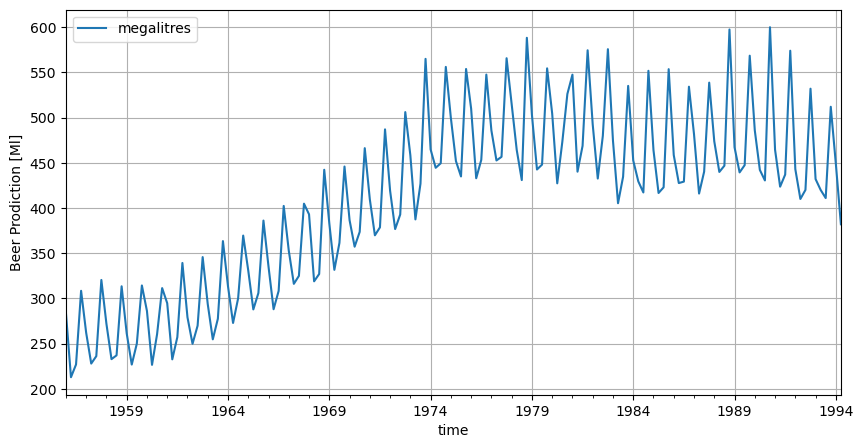

In [50]:
# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
# All data
AusBeer.plot(ax=ax)
ax.set_xlabel("time")
ax.set_ylabel("Beer Prodiction [Ml]")
ax.grid()

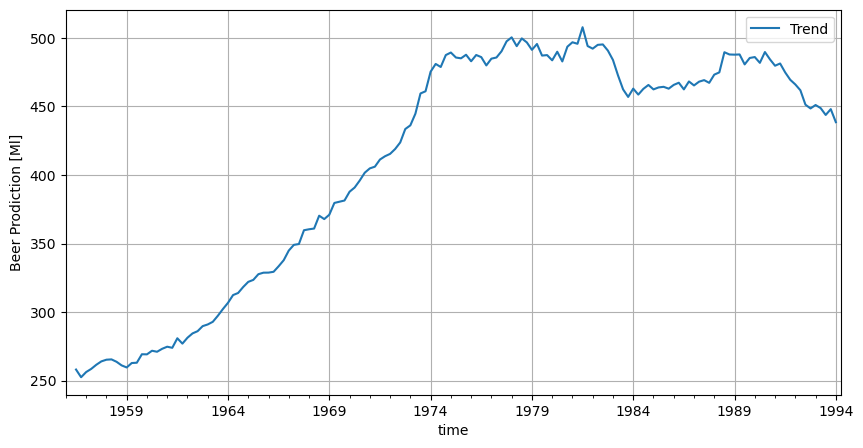

In [ ]:
# 11.2 b) Plot
AusBeer["Trend"] = AusBeer["megalitres"].rolling(window=4, center=True).mean()

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
AusBeer.plot(y="Trend", ax=ax)
ax.set_xlabel("time")
ax.set_ylabel("Beer Prodiction [Ml]")
ax.grid()

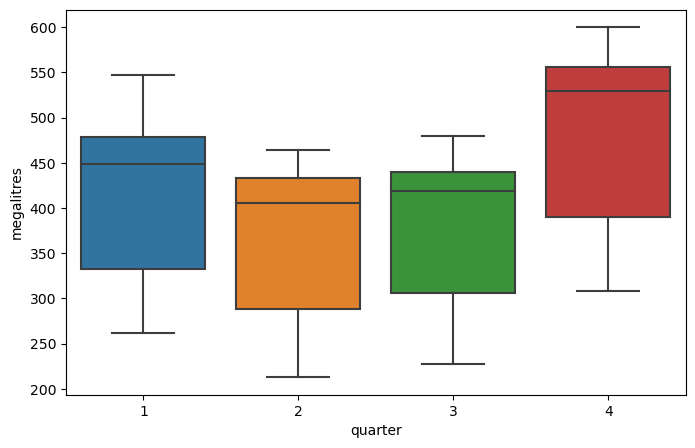

In [ ]:
import seaborn as sns
# Plot using Seaborn
fig, ax = plt.subplots(figsize=(8, 5))
AusBeer['quarter'] = AusBeer.index.quarter
sns.boxplot(data=AusBeer, x='quarter', y="megalitres")
plt.show()


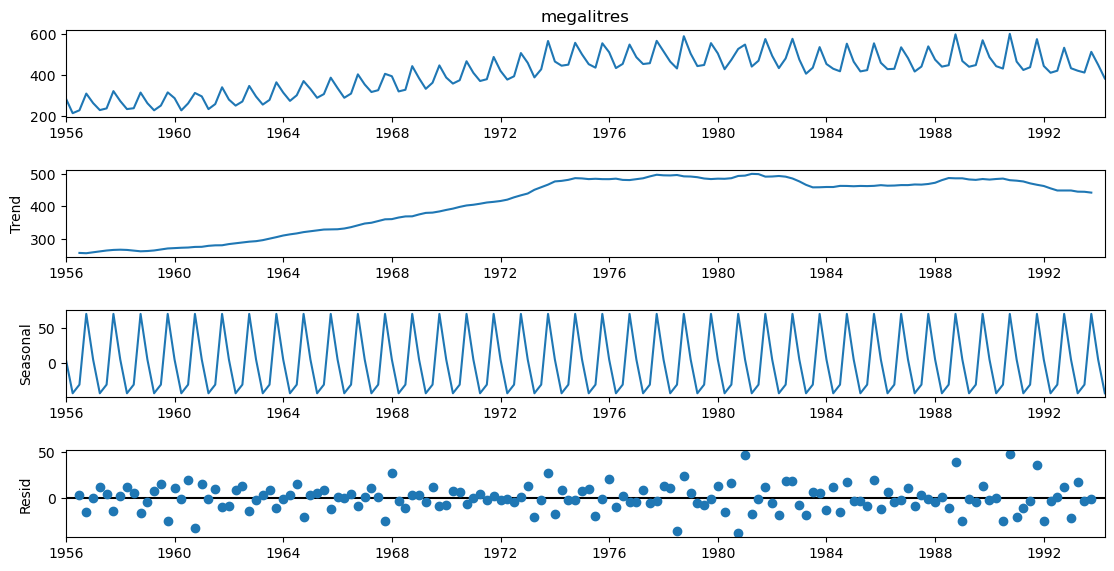

In [ ]:
# 11.2 c) Seasonal Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(AusBeer["megalitres"],
                            model = "additive", # "additive" or "multiplicative"
                            period=4) ## --> 4 für Quartal
# Plot
fig = decomp.plot()
fig.set_size_inches(12, 6)
plt.show()

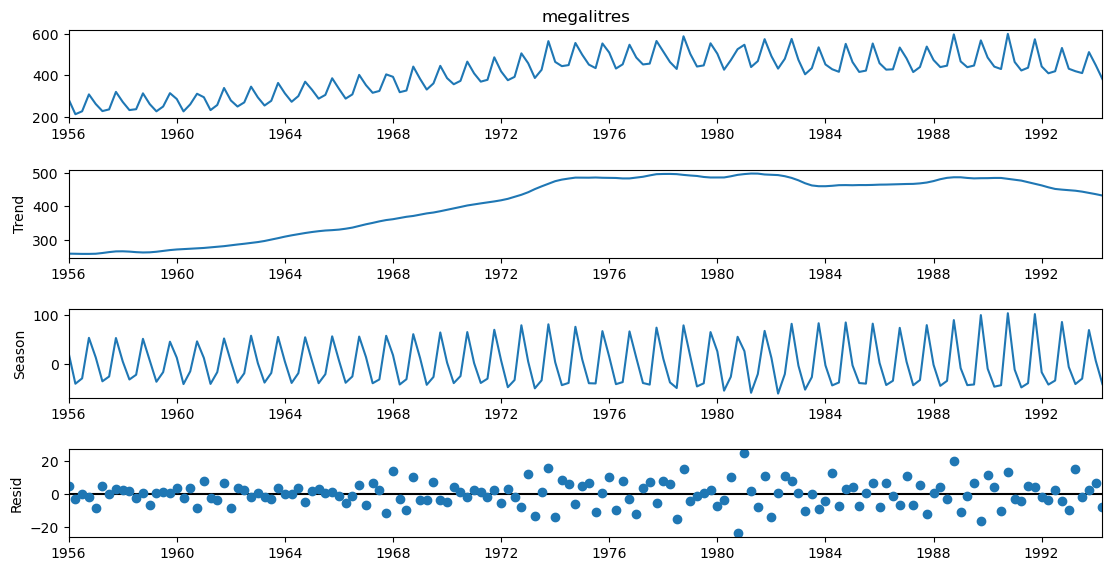

In [71]:
# 11.2 d) Seasonal Decomposition with STL

from statsmodels.tsa.seasonal import STL
# Decomposition on log-model using STL
decomp = STL(AusBeer["megalitres"], seasonal=5)
decomp = decomp.fit()
# Plot
fig = decomp.plot()
fig.set_size_inches(12, 6)
plt.show()


## Aufgabe 11.3

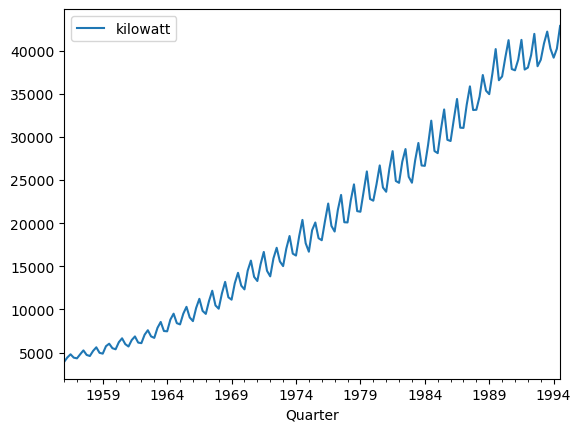

In [84]:
df = pd.read_csv('data/AustralianElectricity.csv', sep=';', header=0)
df.head()

df["Quarter"] = pd.to_datetime(df["Quarter"])
dtindex = pd.DatetimeIndex(data=df["Quarter"], freq='infer') # create Pandas DateTimeIndex

df.set_index(dtindex, inplace=True) # Set as Index
df.drop("Quarter", axis=1, inplace=True) # Drop original column
df.plot(y="kilowatt")
plt.show()


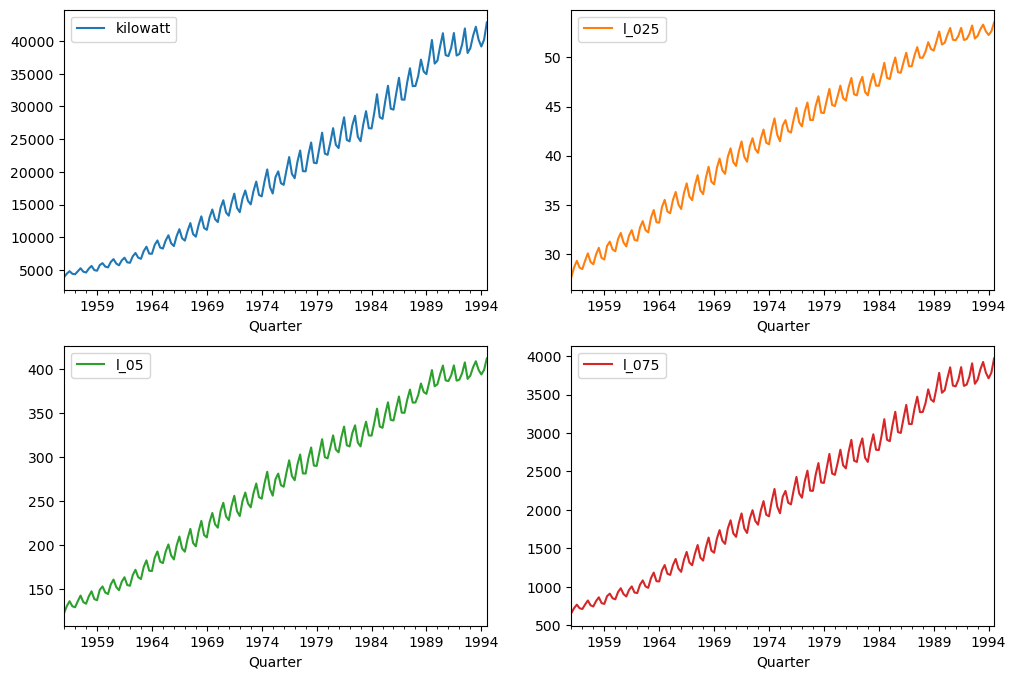

In [87]:
# 11.3 b) boxcox

# Boxcox Definition:
def boxcox(x, lambd):
    if (lambd == 0):
        return np.log(x)
    else:
        return (x ** lambd - 1) / lambd
    

# Apply transform
df["l_025"] =   boxcox(df["kilowatt"], 0.25)
df["l_05"] =    boxcox(df["kilowatt"], 0.5)
df["l_075"] =   boxcox(df["kilowatt"], 0.75)
# Plots
fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
df.plot(ax=ax[:], subplots=True)
plt.show()
